In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


In [40]:
# load datafiles
fnames = [
    '/Users/georgeau/Desktop/research_data/exacloud/2021_12_21/20211215_182945_emcee_transporter/pt_output_burn_removed.csv',
    '/Users/georgeau/Desktop/research_data/exacloud/2021_12_21/20211215_183053_emcee_transporter/pt_output_burn_removed.csv',
    '/Users/georgeau/Desktop/research_data/exacloud/2021_12_21/20211215_183137_emcee_transporter/pt_output_burn_removed.csv',
    '/Users/georgeau/Desktop/research_data/exacloud/2021_12_21/20211215_222615_emcee_transporter/pt_output_burn_removed.csv',
]
model_ids = ['model1', 'model2', 'model3', 'model4']
n_cols = 7

D_list = []
col_list = [i+1 for i in range(n_cols)]  # only keep columns 1...n_p-1 

for f in fnames:
    D_tmp = np.genfromtxt(f, delimiter=',', skip_header=1,usecols=col_list).T  
    D_list.append(D_tmp)

logl_list = []
for i in range(len(D_list)):
    logl_list.append(D_list[i][-1])  # logl is last row in .csv file
logl = np.array(logl_list)
print(logl.shape)
print('check for issues in model overlap comparison! potential bug!')

(4, 1200000)
check for issues in model overlap comparison! potential bug!


In [21]:
# prepare logl distributions
logl_max = logl.max()
logl_rel = logl - logl_max
print(logl.min(),logl.max())
print(logl_rel.max())
print(logl_rel.shape)

for i in range(len(logl_rel)):
    print(f'model {i+1} relative log-likelihood')
    print(f'range: ({np.min(logl_rel[i])},{np.max(logl_rel[i])})')
    print(f'mean: {np.mean(logl_rel[i])}, median: {np.median(logl_rel[i])}')
    print(f'std: {np.std(logl_rel[i])}\n')


8628.742506132585 14279.14008546593
0.0
(4, 1200000)
model 1 relative log-likelihood
range: (-20.52508302397655,0.0)
mean: -3.054950039144026, median: -2.723021331568816
std: 1.7530577503084799

model 2 relative log-likelihood
range: (-1097.057312018178,-803.7314288435355)
mean: -921.9286100545978, median: -836.6967797821653
std: 125.04807843529679

model 3 relative log-likelihood
range: (-5650.397579333345,-2899.4835736570767)
mean: -2968.476589575814, median: -2942.071387011667
std: 274.83123581866937

model 4 relative log-likelihood
range: (-5650.397579333345,-2899.4835736570767)
mean: -2968.476589575814, median: -2942.071387011667
std: 274.83123581866937



(-5650.397579333345, 0.0)


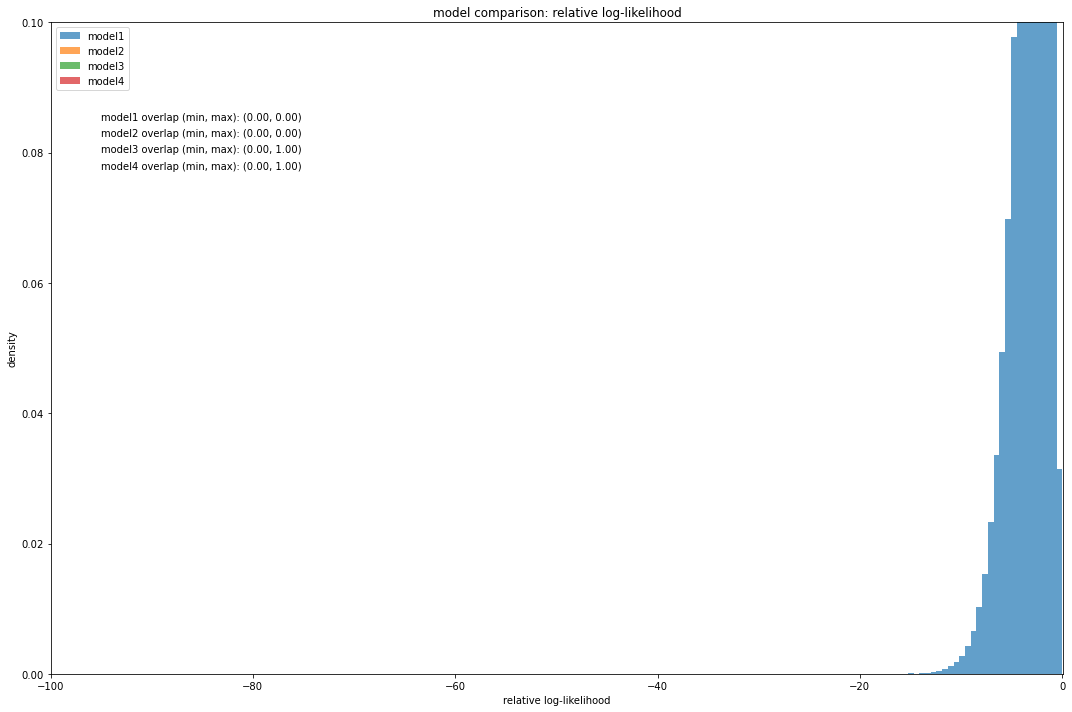

In [6]:
# plot relative log likelihood
h_range = (logl_rel.min(), logl_rel.max())
bins = 10000
h_list = []
e_list = []
print(h_range)

fig= plt.figure(figsize=(15,10))
ax = plt.axes()
for i in range(logl_rel.shape[0]):
    logl_tmp = logl_rel[i]
    hist_tmp, edges_tmp = np.histogram(logl_tmp, bins=bins, range=h_range, density=True)  # make histogram (density)
    h_list.append(hist_tmp)
    e_list.append(edges_tmp)
    plt.bar(edges_tmp[:-1], hist_tmp, width=np.diff(edges_tmp), align='edge',alpha = 0.7, label=model_ids[i])  # plot histogram
plt.legend()
plt.title('model comparison: relative log-likelihood')
plt.xlabel('relative log-likelihood')
plt.ylabel('density')
plt.ylim(0,0.1)
plt.xlim(-100,0.1)
plt.tight_layout()




def calc_ovl(h1,h2,b_w):
    'calculates OVL for 2 histograms with equal bin widths (b_w)'
    y = []
    assert(len(h1)==len(h2))
    for i in range(len(h1)):
        y_i = np.min([h1[i]*b_w,h2[i]*b_w])
        y.append(y_i)
    return np.sum(y)

for i in range(len(model_ids)):
    h_1 = h_list[i]
    b_w = np.abs(e_list[i][1]-e_list[i][0])  # warning! using last edges list 
    h_list_tmp =  h_list.copy()
    h_list_tmp.pop(i)
    ovl_tmp_list = []
    for h_tmp in h_list_tmp:
        ovl_tmp_list.append(f'{calc_ovl(h_1,h_tmp,b_w):.2f}')
    plt.text(0.05,0.85-(i*.025), f'{model_ids[i]} overlap (min, max): ({min(ovl_tmp_list)}, {max(ovl_tmp_list)})', transform=ax.transAxes)

plt.savefig('model_comparison_test2.png')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7fac309370>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7fac309a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7fb7428fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7fb743d1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7fb743d580>],
 'means': []}

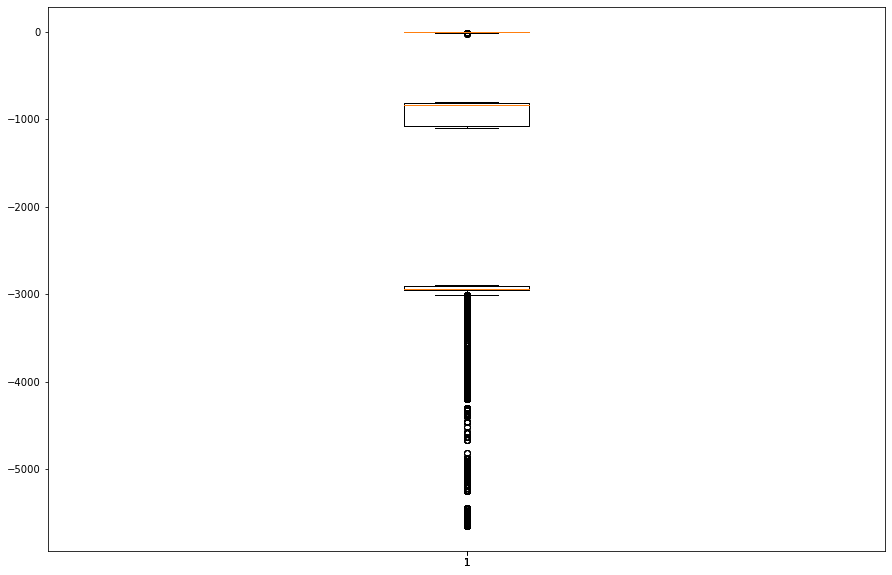

In [24]:
# violin plot
fig= plt.figure(figsize=(15,10))
ax = plt.axes()

plt.boxplot(logl_rel[0])
plt.boxplot(logl_rel[1])
plt.boxplot(logl_rel[2])
plt.boxplot(logl_rel[3])

In [25]:
col_list = [1,2,3,4,5,6,7,8]
D_pt = np.genfromtxt('/Users/georgeau/Desktop/GitHub/august/model_identification/affine_MCMC_PT/stretch_snooker_05_run_pt_data.csv', delimiter=',', skip_header=1,usecols=col_list).T  
D_mc = np.genfromtxt('/Users/georgeau/Desktop/GitHub/august/model_identification/affine_MCMC_PT/stretch_snooker_05_run1_data.csv', delimiter=',', skip_header=1,usecols=col_list).T  

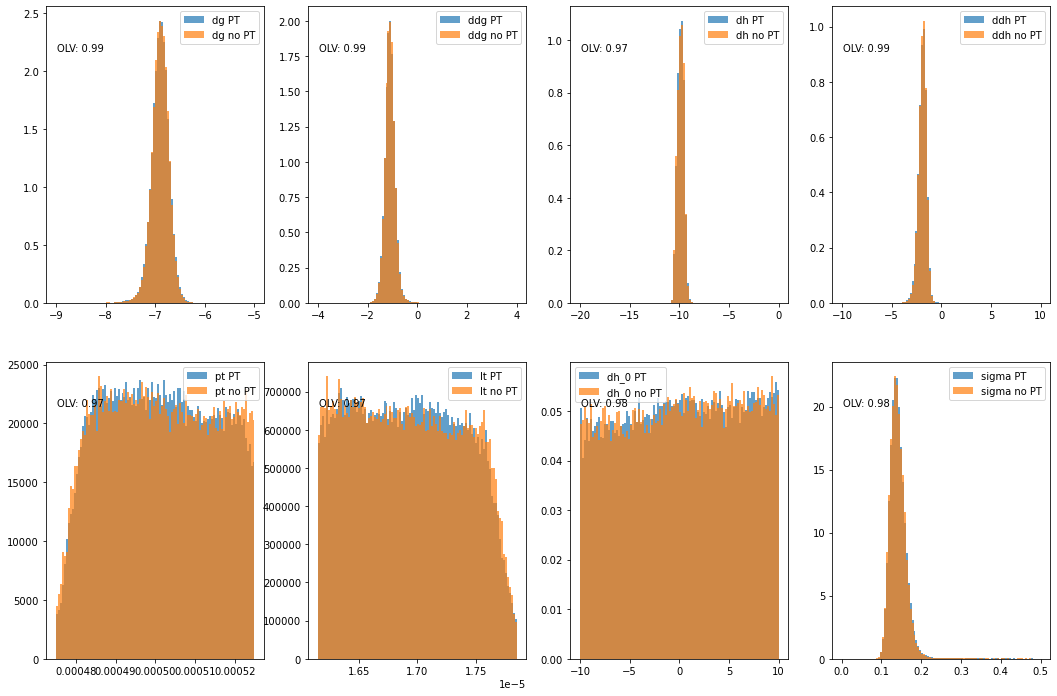

In [39]:
bins=100

bounds = [(-9,-5),(-4,4),(-20,0),(-10,10),(0.0005-0.0005*0.05,0.0005+0.0005*0.05), ((1.7e-05)-(1.7e-05)*0.05, (1.7e-05)+(1.7e-05)*0.05), (-10,10), (0.001,0.5)]
labels = ["dg", "ddg", "dh", "ddh", "pt", "lt", "dh_0", "sigma"]
fig, axs = plt.subplots(2, 4, figsize=(18,12))
ax = axs.flat
for i in range(len(labels)):
    x1_tmp = D_pt[i]
    x2_tmp = D_mc[i]
    hist_tmp1, edges_tmp1 = np.histogram(x1_tmp, bins=bins, range=bounds[i], density=True)  # make histogram (density)
    hist_tmp2, edges_tmp2 = np.histogram(x2_tmp, bins=bins, range=bounds[i], density=True)  # make histogram (density)
    ax[i].bar(edges_tmp1[:-1], hist_tmp1, width=np.diff(edges_tmp1),  align='edge',alpha = 0.7, label=f'{labels[i]} PT')  # plot histogram
    ax[i].bar(edges_tmp2[:-1], hist_tmp2, width=np.diff(edges_tmp2), align='edge',alpha = 0.7, label=f'{labels[i]} no PT')  # plot histogram
    ax[i].legend()

    def calc_ovl(h1,h2,b_w):
        'calculates OVL for 2 histograms with equal bin widths (b_w)'
        y = []
        assert(len(h1)==len(h2))
        for i in range(len(h1)):
            y_i = np.min([h1[i]*b_w,h2[i]*b_w])
            y.append(y_i)
        return np.sum(y)
    
    plt.text(0.05,0.85, f'OLV: {calc_ovl(hist_tmp1,hist_tmp2,np.diff(edges_tmp1)):.2f}', transform=ax[i].transAxes)

    